In [40]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [2]:
data=pd.read_csv(r"C:\Users\goura\Downloads\CWML\Churn_Modelling.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [5]:
data["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [6]:
data.skew()

C:\Users\goura\AppData\Local\Temp\ipykernel_12396\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [7]:
data.corr()

C:\Users\goura\AppData\Local\Temp\ipykernel_12396\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [8]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [9]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
data["Gender"]=data["Gender"].map({"Female":1,"Male":0})
data["Geography"]=data["Geography"].map({"France":1,"Spain":2,"Germany":3})

In [13]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,1,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,1,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,3,0,42,3,75075.31,2,1,0,92888.52,1


In [27]:
X=data.iloc[:,3:13]
Y=data["Exited"]

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [29]:
len(X_train),len(X_test)

(8000, 2000)

In [31]:
X_train["Gender"].value_counts()

0    4353
1    3647
Name: Gender, dtype: int64

In [33]:
Y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [35]:
Y_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [36]:
trainer=LogisticRegression()

In [37]:
learner=trainer.fit(X_train,Y_train)

In [38]:
y_pred_test=learner.predict(X_test)

In [39]:
accuracy_score(y_pred_test,Y_test)

0.7965

In [41]:
cm=confusion_matrix(Y_test,y_pred_test)

In [42]:
cm

array([[1593,    0],
       [ 407,    0]], dtype=int64)

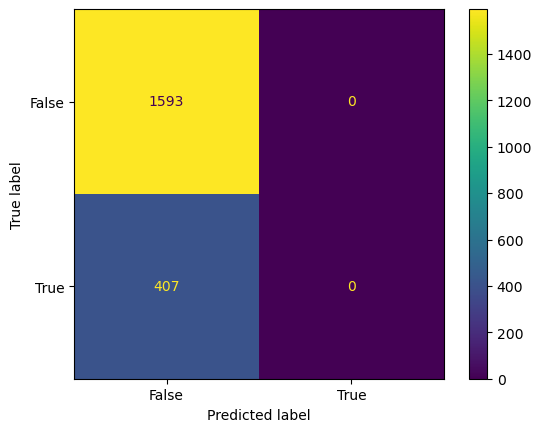

In [43]:
cmm=ConfusionMatrixDisplay(cm,display_labels=[False,True])
cmm.plot()

In [57]:
cr=classification_report(Y_test,y_pred_test)

C:\Users\goura\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\goura\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\goura\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [60]:
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



In [61]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,1,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,1,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,3,0,42,3,75075.31,2,1,0,92888.52,1


In [66]:
def predict(CreditScore,Geography,Gender,Age,Tenure,Balance,NOofProduct,Hascrcard,activemember,EstSalary):
    import numpy as np
    inp=(CreditScore,Geography,Gender,Age,Tenure,Balance,NOofProduct,Hascrcard,activemember,EstSalary)
    test=np.asarray(inp)
    test_reshape=test.reshape(1,-1)
    t_pred=learner.predict(test_reshape)
    return t_pred[0]

In [67]:
predict(854,2,1,42,9,45566,1,1,0,36225)

C:\Users\goura\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

In [68]:
import gradio as gr
demo = gr.Interface(
    fn=predict,
    inputs=["number", "number","number","number","number","number","number","number","number","number"],
    outputs=["number"],
)
demo.launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.
